## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import linregress


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
study_data_complete = pd.merge(study_results, mouse_metadata, how="left", on="Mouse ID")

# Display the data table for preview
study_data_complete.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
# print(study_data_complete.nunique())
# print()
print(f"unique mice: {study_data_complete['Mouse ID'].nunique()}")

unique mice: 249


In [3]:
study_data_complete

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
cnt = pd.DataFrame(study_data_complete[['Mouse ID', 'Timepoint']].value_counts())
cnt.columns = ['Counts of Mouse ID']

cnt[cnt['Counts of Mouse ID'] > 1]

Counts of Mouse ID
Mouse ID Timepoint                    
g989     20                          2
         15                          2
         10                          2
         5                           2
         0                           2

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
# set the index to the mouse ID
study_data_complete_ind = study_data_complete.set_index('Mouse ID')
study_data_complete_ind

# check the mouse data for ID
ind = cnt[cnt['Counts of Mouse ID'] > 1].index[0][0]
study_data_complete_ind.loc[ind]

,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
Mouse ID,,,,,,,
g989,0,45.000000,0,Propriva,Female,21,26
g989,0,45.000000,0,Propriva,Female,21,26
g989,5,48.786801,0,Propriva,Female,21,26
g989,5,47.570392,0,Propriva,Female,21,26
g989,10,51.745156,0,Propriva,Female,21,26
g989,10,49.880528,0,Propriva,Female,21,26
g989,15,51.325852,1,Propriva,Female,21,26
g989,15,53.442020,0,Propriva,Female,21,26
g989,20,55.326122,1,Propriva,Female,21,26


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
df = study_data_complete[study_data_complete["Mouse ID"] != ind]
df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [7]:
# Checking the number of mice in the clean DataFrame.
print(f"unique mice: {df['Mouse ID'].nunique()}")

unique mice: 248


## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for 
# each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

df1 = df[['Drug Regimen', 'Tumor Volume (mm3)']]
# series variable to hold Tumor Volume Data grouped by Drug Regimen
# variable to hold the Mean Tumor Volume Data Grouped by Drug Regimen
mean = df1.groupby('Drug Regimen').mean()['Tumor Volume (mm3)']
# print(mean)
# variable to hold median Tumor Volume Data Grouped by Drug Regimen
median = df1.groupby('Drug Regimen').median()['Tumor Volume (mm3)']
# print(median)
# variable to hold the Tumor Volume Variance Data Grouped by Drug Regimen
var = df1.groupby('Drug Regimen').var()['Tumor Volume (mm3)']
# print(var)
# variable to hold the Tumor Volume Standard Deviation Data Grouped by Drug Regimen
std = df1.groupby('Drug Regimen').std()['Tumor Volume (mm3)']
# print(std)
# variable to hold the Tumor Volume SEM Data Grouped by Drug Regimen
sem = df1.groupby('Drug Regimen').sem()['Tumor Volume (mm3)']
# print(sem)
# Convert to DataFrame
df2 = pd.DataFrame(mean)
df2 = df2.rename(columns={'Tumor Volume (mm3)': 'Mean Tumor Volume'})
df2['Median Tumor Volume'] = median
df2['Tumor Volume Variance'] = var
df2['Tumor Volume Stdev'] = std
df2['Tumor Volume SEM'] = sem


# Preview DataFrame
df2

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Stdev,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
df3 = df1.groupby('Drug Regimen').agg(
    {
        'Tumor Volume (mm3)': ['mean', 'median', 'var', 'std', 'sem']
    }
)
# df3
df3.columns = ['Mean Tumor Volume', 'Median Tumor Volume', 'Tumor Volume Variance', 'Tumor Volume Stdev', 'Tumor Volume SEM']
df3

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Stdev,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [10]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
# df1.value_counts()
# list of unique drug regimens
print(list(df1['Drug Regimen'].drop_duplicates()))
# drug regimen as x-axis values for plotting
xaxis = list(df1['Drug Regimen'].drop_duplicates())

# drop all duplicate mice
list(df1['Drug Regimen'].drop_duplicates())
df4 = study_data_complete[['Drug Regimen', 'Mouse ID']]
df5 = df4.drop_duplicates()

# get mice counts per drug
df6 = pd.DataFrame(df5['Drug Regimen'].value_counts()).reset_index()
df6.columns = ['Drug Regimen', 'Mice Count']
df6

['Capomulin', 'Ketapril', 'Naftisol', 'Infubinol', 'Stelasyn', 'Ramicane', 'Zoniferol', 'Propriva', 'Placebo', 'Ceftamin']


,Drug Regimen,Mice Count
0,Naftisol,25
1,Infubinol,25
2,Placebo,25
3,Ramicane,25
4,Zoniferol,25
5,Ketapril,25
6,Capomulin,25
7,Ceftamin,25
8,Propriva,25
9,Stelasyn,24


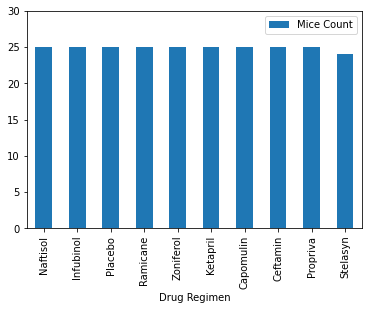

In [11]:
# plot the mouse counts for each drug using pandas
df6.plot.bar(x='Drug Regimen', y='Mice Count')
plt.ylim([0, 30])

plt.show()

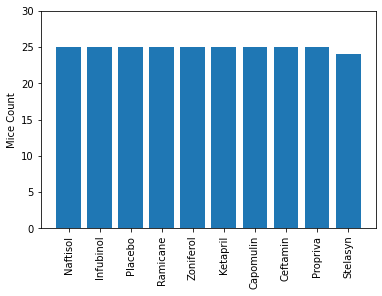

In [12]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
# plot the bar graph of mice count per drug regimen
# df6

plt.bar(df6['Drug Regimen'], df6['Mice Count'])

plt.ylim(0, 30)
plt.xticks(rotation=90)
plt.ylabel('Mice Count')

plt.show()

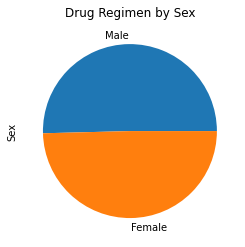

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
dfsex = df[['Mouse ID', 'Sex']].drop_duplicates()
seriessex = dfsex['Sex'].value_counts()

seriessex.plot.pie()
plt.title('Drug Regimen by Sex')

plt.show()

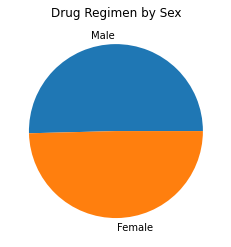

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(seriessex, labels=['Male', 'Female'])
plt.title('Drug Regimen by Sex')

plt.show()

## Quartiles, Outliers and Boxplots

In [15]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# set drug regimen as index and drop associated regimens while only keeping Capomulin, Ramicane, Infubinol, and Ceftamin
# dfall = df[['Drug Regimen', 'Mouse ID', 'Timepoint', 'Tumor Volume (mm3)']]
# dfsome = dfall[dfall['Drug Regimen'].isin(['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])]
# dfsome['Drug Regimen'].value_counts()
dfall = df.set_index('Drug Regimen')
dfsome = dfall.loc[['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']]
# dfsome.index.value_counts()

# isolated view of just capomulin for later use
dfsome.loc['Capomulin']

# Reset index so drug regimen column persists after inner merge
dfsome = dfsome.reset_index()

# get mouse count per drug
dfsomemice = dfsome[['Drug Regimen', 'Mouse ID']].drop_duplicates()
dfsomemice['Drug Regimen'].value_counts()

# Start by getting the last (greatest) timepoint for each mouse
dfsome = dfsome.sort_values(by='Mouse ID').reset_index(drop=True)

dfsometime = dfsome[['Mouse ID', 'Drug Regimen', 'Timepoint']]
dffinaltime = dfsometime.groupby(['Mouse ID', 'Drug Regimen']).max().reset_index().rename(columns={'Timepoint':'Final Timepoint'})
dffinaltime

,Mouse ID,Drug Regimen,Final Timepoint
0,a203,Infubinol,45
1,a251,Infubinol,45
2,a275,Ceftamin,45
3,a411,Ramicane,45
4,a444,Ramicane,45
...,...,...,...
95,y769,Ceftamin,45
96,y793,Capomulin,45
97,y865,Ceftamin,45
98,z578,Ramicane,45


In [16]:
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
# df
dffinal = dffinaltime.merge(df, how='left', left_on=['Mouse ID', 'Drug Regimen', 'Final Timepoint']
                                           , right_on=['Mouse ID', 'Drug Regimen', 'Timepoint']).drop(columns='Final Timepoint')
# show all rows of data
pd.set_option('display.max_rows', None)
# pd.reset_option('display.max_rows')

dffinal

,Mouse ID,Drug Regimen,Timepoint,Tumor Volume (mm3),Metastatic Sites,Sex,Age_months,Weight (g)
0,a203,Infubinol,45,67.973419,2,Female,20,23
1,a251,Infubinol,45,65.525743,1,Female,21,25
2,a275,Ceftamin,45,62.999356,3,Female,20,28
3,a411,Ramicane,45,38.407618,1,Male,3,22
4,a444,Ramicane,45,43.047543,0,Female,10,25
5,a520,Ramicane,45,38.810366,1,Male,13,21
6,a577,Infubinol,30,57.031862,2,Female,6,25
7,a644,Ramicane,45,32.978522,1,Female,7,17
8,a685,Infubinol,45,66.083066,3,Male,8,30
9,b128,Capomulin,45,38.982878,2,Female,9,22


In [17]:
# Put treatments into a list for for loop (and later for plot labels)
#set drugs to be analyzed, colors for the plots, and markers
drug_l = list(set(dffinal['Drug Regimen']))
print(drug_l)

# Create empty list to fill with tumor vol data (for plotting)
tumor_l = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.
print()
q1 = dffinal['Tumor Volume (mm3)'].quantile(0.25)
q3 = dffinal['Tumor Volume (mm3)'].quantile(0.75)
q2 = dffinal['Tumor Volume (mm3)'].median()
print(f'lower quartile of final tumor vol: {q1}')
print(f'higher quarter of final tumor vol: {q3}')
print(f'interquartile range of final tumor vol: {q3 - q1}')
print()
print(f'median of final tumor vol: {q2}')

# dffinal['Tumor Volume (mm3)'].plot.box()
# plt.show()
# Locate the rows which contain mice on each drug and get the tumor volumes
dffinal = dffinal[['Mouse ID', 'Drug Regimen', 'Tumor Volume (mm3)']]
dffinal

['Infubinol', 'Ceftamin', 'Capomulin', 'Ramicane']

lower quartile of final tumor vol: 37.1877438025
higher quarter of final tumor vol: 59.930261755
interquartile range of final tumor vol: 22.742517952499995

median of final tumor vol: 45.0


,Mouse ID,Drug Regimen,Tumor Volume (mm3)
0,a203,Infubinol,67.973419
1,a251,Infubinol,65.525743
2,a275,Ceftamin,62.999356
3,a411,Ramicane,38.407618
4,a444,Ramicane,43.047543
5,a520,Ramicane,38.810366
6,a577,Infubinol,57.031862
7,a644,Ramicane,32.978522
8,a685,Infubinol,66.083066
9,b128,Capomulin,38.982878


In [18]:
# Determine outliers using upper and lower bounds
# using 68-95-99.7 rule
# lb = dffinal['Tumor Volume (mm3)'].quantile(0.0015)
# ub = dffinal['Tumor Volume (mm3)'].quantile(0.9985)
# using Tukey original defn of boxplots and default plot
lb = q1 - 1.5 * (q3 - q1)
ub = q3 + 1.5 * (q3 - q1)
print(f"outliers can be: {lb} or {ub}")
# dffinal.plot.box()
# plt.show()
lo = dffinal[dffinal['Tumor Volume (mm3)'] < lb]
uo = dffinal[dffinal['Tumor Volume (mm3)'] > ub]

pd.concat([lo, uo])

outliers can be: 3.0739668737500097 or 94.04403868374999


,Mouse ID,Drug Regimen,Tumor Volume (mm3)


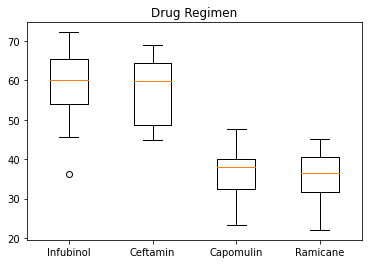

In [19]:
# add subset
tumor_l = []
for drug in drug_l:
#     print(drug)
    tumor = list(dffinal[dffinal['Drug Regimen'] == drug]['Tumor Volume (mm3)'])
#     print(tumor)
#     print()
    
    tumor_l.append(tumor)
# print(tumor_l)

    
# tumor volumes for each Drug Regimen
# using matplotlib on subset lists
plt.boxplot(tumor_l, labels=drug_l)
plt.title('Drug Regimen')
plt.show()

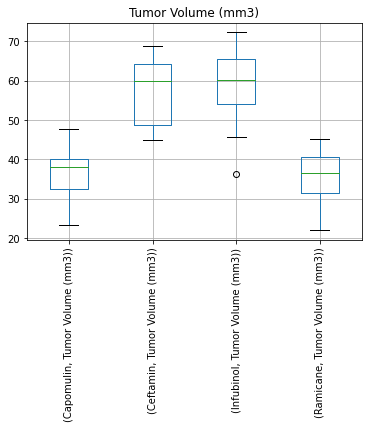

In [20]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
# using pandas groupby
dffinal.groupby('Drug Regimen').boxplot(subplots=False, rot=90)
plt.title('Tumor Volume (mm3)')

plt.show()

## Line and Scatter Plots

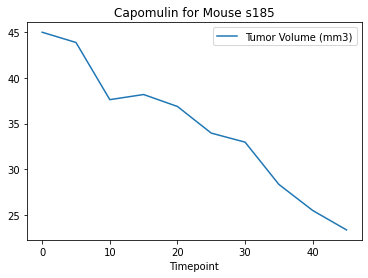

In [21]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
#change index to mouse ID 
dfa = df[df['Drug Regimen'] == 'Capomulin'].set_index('Mouse ID')
#remove other mouse IDs so only s185 shows
dfa = dfa.loc['s185']
dfa

#set the x-axis equal to the Timepoint and y-axis to Tumor Volume
dfa = dfa[['Timepoint', 'Tumor Volume (mm3)']].reset_index(drop=True).set_index('Timepoint')
dfa.plot()
plt.title('Capomulin for Mouse s185')

plt.show()

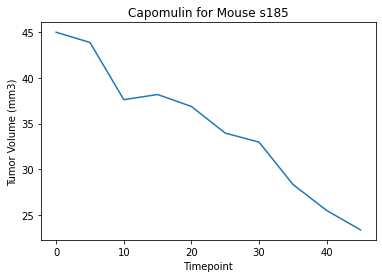

In [22]:
plt.plot(dfa)
plt.title('Capomulin for Mouse s185')
plt.xlabel(dfa.index.name)
plt.ylabel(dfa.columns[0])

plt.show()

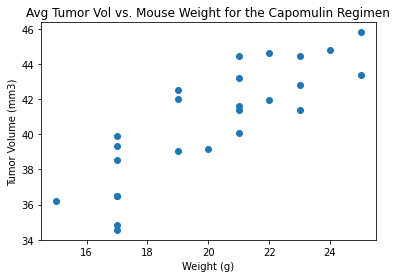

In [23]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
# group by mouse ID to find average tumor volume
dfcap = df[df['Drug Regimen'] == 'Capomulin']
dfcap.sort_values(by='Mouse ID')
dfv = dfcap[['Mouse ID', 'Tumor Volume (mm3)']].groupby('Mouse ID').mean()
# dfv

# establish x-axis value for the weight of the mice
dfw = dfcap[['Mouse ID', 'Weight (g)']].drop_duplicates()
# dfw
# print(len(dfv), len(dfw))
dfwv = dfv.merge(dfw, how='inner', on='Mouse ID')
# produce scatter plot of the data
x = dfwv['Weight (g)']
y = dfwv['Tumor Volume (mm3)']

plt.scatter(x, y)
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Avg Tumor Vol vs. Mouse Weight for the Capomulin Regimen')


plt.show()

## Correlation and Regression

slope: 0.9544396890241045
intercept: 21.552160532685015
best fit line: 0.9544396890241045 x + 21.552160532685015


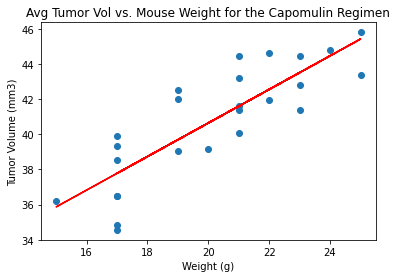

In [24]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
#establish x and y values and find St. Pearson Correlation Coefficient for Mouse Weight and Tumor Volume Avg
# print(linregress(dfwv['Weight (g)'], dfwv['Tumor Volume (mm3)']))
# print()

#print St. Pearson Correlation Coefficient
m = linregress(x, y).slope
print(f'slope: {m}')

# establish linear regression values
c = linregress(x, y).intercept
print(f'intercept: {c}')
# linear regression line 
print(f'best fit line: {m} x + {c}')

# scatter plot of the data
plt.scatter(x, y)
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Avg Tumor Vol vs. Mouse Weight for the Capomulin Regimen')

plt.plot(x, m * x + c, color='r')

plt.show()